In [32]:
import pandas as pd
import numpy as np
import os
import moviepy as mp
import shutil

In [88]:
data = pd.read_csv('Output/System 2/Sim 2.csv', header=0)
data

,m,n,o,num_images,pos_rms,mag_rms,chi2,"$z_{s,fid}$",x,y,e,$θ_{e}$,$r_{Ein}$,$\gamma$ (PWI),source_x,source_y
0,1.5,0.0,0.00000,0,NaN,NaN,345.7691,1.0,0.092115,0.036666,0.0,0.00000,0.480595,1.5,0.092115,0.036666
1,1.5,0.0,3.63636,0,NaN,NaN,345.7691,1.0,0.092115,0.036666,0.0,3.63636,0.480595,1.5,0.092115,0.036666
2,1.5,0.0,7.27273,0,NaN,NaN,345.7691,1.0,0.092115,0.036666,0.0,7.27273,0.480595,1.5,0.092115,0.036666
3,1.5,0.0,10.90909,0,NaN,NaN,345.7691,1.0,0.092115,0.036666,0.0,10.90909,0.480595,1.5,0.092115,0.036666
4,1.5,0.0,14.54545,0,NaN,NaN,345.7691,1.0,0.092115,0.036666,0.0,14.54545,0.480595,1.5,0.092115,0.036666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2.5,0.9,345.45455,4,0.510547,66.107400,6036.7270,1.0,0.244203,0.032371,0.9,345.45450,0.538179,2.5,0.021207,0.089867
999996,2.5,0.9,349.09091,4,0.530791,48.885725,4069.9740,1.0,0.238740,0.037739,0.9,349.09090,0.545267,2.5,0.009774,0.081585
999997,2.5,0.9,352.72727,4,0.549306,52.122575,2260.4220,1.0,0.236256,0.040891,0.9,352.72730,0.546907,2.5,0.004785,0.070256
999998,2.5,0.9,356.36364,4,0.563281,38.620025,737.3184,1.0,0.235912,0.041697,0.9,356.36360,0.542852,2.5,0.005800,0.056219


In [89]:
# data['$\\sigma$'].unique()
data['$\\gamma$ (PWI)'].unique()
# data['c or $r_{s}$'].unique()

array([1.5    , 1.5101 , 1.5202 , 1.5303 , 1.5404 , 1.55051, 1.56061,
       1.57071, 1.58081, 1.59091, 1.60101, 1.61111, 1.62121, 1.63131,
       1.64141, 1.65152, 1.66162, 1.67172, 1.68182, 1.69192, 1.70202,
       1.71212, 1.72222, 1.73232, 1.74242, 1.75253, 1.76263, 1.77273,
       1.78283, 1.79293, 1.80303, 1.81313, 1.82323, 1.83333, 1.84343,
       1.85354, 1.86364, 1.87374, 1.88384, 1.89394, 1.90404, 1.91414,
       1.92424, 1.93434, 1.94444, 1.95455, 1.96465, 1.97475, 1.98485,
       1.99495, 2.00505, 2.01515, 2.02525, 2.03535, 2.04545, 2.05556,
       2.06566, 2.07576, 2.08586, 2.09596, 2.10606, 2.11616, 2.12626,
       2.13636, 2.14646, 2.15657, 2.16667, 2.17677, 2.18687, 2.19697,
       2.20707, 2.21717, 2.22727, 2.23737, 2.24747, 2.25758, 2.26768,
       2.27778, 2.28788, 2.29798, 2.30808, 2.31818, 2.32828, 2.33838,
       2.34848, 2.35859, 2.36869, 2.37879, 2.38889, 2.39899, 2.40909,
       2.41919, 2.42929, 2.43939, 2.44949, 2.4596 , 2.4697 , 2.4798 ,
       2.4899 , 2.5 

In [90]:
# mask_data = data[data['$\\sigma$'] == 143.3333]
mask_data = data[data['$\\gamma$ (PWI)'] == 2.30808]
# mask_data = data[data['c or $r_{s}$'] == 89.49495]


Step 2: Extracting data from DataFrame for interpolation...
Extracted 10000 points.

Step 3: Creating an interpolation function from the data...
Interpolator function created successfully.

Step 4: Running Nelder-Mead optimizer on the interpolated surface...
Iteration 1: f_min = 8.620062e+02, rtol = 1.873711e+00
Iteration 2: f_min = 8.620062e+02, rtol = 1.871906e+00
Iteration 3: f_min = 8.620062e+02, rtol = 1.609083e+00
Iteration 4: f_min = 8.620062e+02, rtol = 9.016620e-01
Iteration 5: f_min = 6.744774e+02, rtol = 3.873745e-01
Iteration 6: f_min = 5.558874e+02, rtol = 4.317937e-01
Iteration 7: f_min = 3.925971e+02, rtol = 5.283234e-01
Iteration 8: f_min = 3.105726e+02, rtol = 5.662461e-01
Iteration 9: f_min = 1.694428e+02, rtol = 7.940872e-01
Iteration 10: f_min = 1.081584e+02, rtol = 9.667984e-01
Iteration 11: f_min = 1.081584e+02, rtol = 5.709923e-01
Iteration 12: f_min = 1.081584e+02, rtol = 4.415284e-01
Iteration 13: f_min = 9.214295e+01, rtol = 3.887262e-01
Iteration 14: f_min =

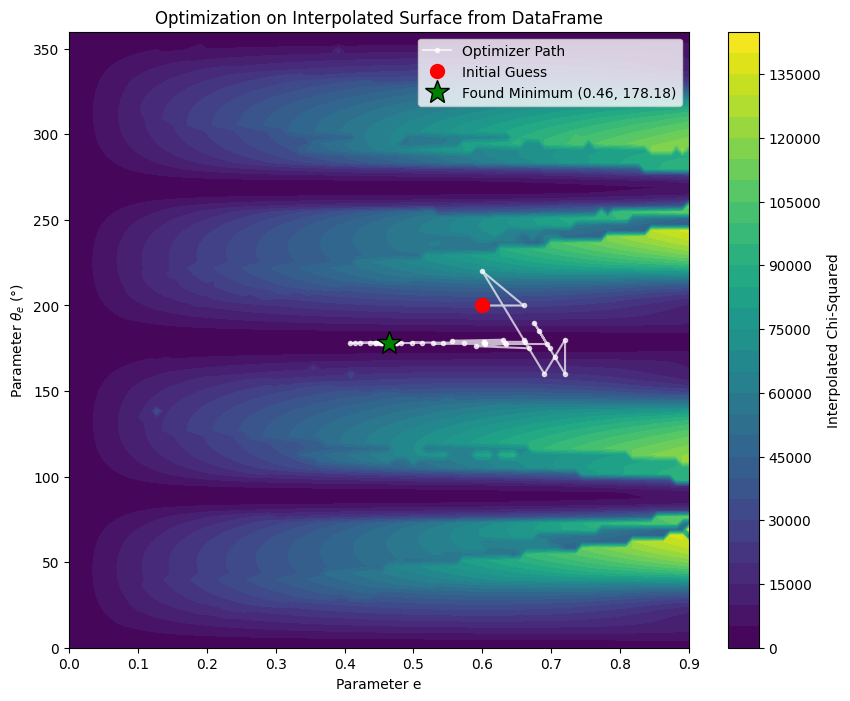

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# (Paste your nelder_mead_glafic_with_history function here)
# This function does not need any changes.
def nelder_mead_glafic_with_history(func, x0, y0, ftol=1e-4, nmax=10000, verbose=False):
    """
    Nelder-Mead simplex optimization matching glafic's implementation,
    with tracking of all evaluation points.
    ... (full code from your prompt) ...
    """
    # Simplex coefficients from glafic
    ALPHA = 1.0  # reflection coefficient
    BETA = 0.5   # contraction coefficient
    GAMMA = 2.0  # expansion coefficient

    n = 2  # number of dimensions

    # Initialize simplex: 3 vertices for 2D problem
    v = np.zeros((n + 1, n))
    f = np.zeros(n + 1)

    # Track all evaluations
    eval_history = []

    # Set initial simplex
    v[0] = [x0, y0]
    dx = 0.1 * abs(x0) if x0 != 0 else 0.1
    dy = 0.1 * abs(y0) if y0 != 0 else 0.1
    v[1] = [x0 + dx, y0]
    v[2] = [x0, y0 + dy]

    # Evaluate function at initial vertices and record
    for i in range(n + 1):
        f[i] = func(v[i][0], v[i][1])
        eval_history.append((v[i][0], v[i][1], f[i]))

    # Main optimization loop
    for itr in range(1, nmax + 1):
        # Handle cases where points are outside interpolation bounds (returning inf)
        f_finite_indices = np.where(np.isfinite(f))[0]
        if len(f_finite_indices) < 3:
            # Not enough valid points to form a simplex, try to shrink
            vs = np.argmin(f) # find the best point we have
            for i in range(n + 1):
                if i != vs:
                    v[i] = v[vs] + (v[i] - v[vs]) / 2.0
                    f[i] = func(v[i][0], v[i][1])
                    eval_history.append((v[i][0], v[i][1], f[i]))
            continue

        # Find indices of best, worst, and second-worst vertices among finite values
        f_temp_finite = f[f_finite_indices]
        vg_idx_finite = np.argmax(f_temp_finite)
        vs_idx_finite = np.argmin(f_temp_finite)
        
        vg = f_finite_indices[vg_idx_finite] # Index in the original f array
        vs = f_finite_indices[vs_idx_finite] # Index in the original f array

        f_temp = f.copy()
        f_temp[vg] = -np.inf
        vh = np.argmax(f_temp)

        # Calculate centroid of all points except worst
        vm = np.mean(v[[i for i in range(n + 1) if i != vg]], axis=0)

        # Reflection
        vr = vm + ALPHA * (vm - v[vg])
        fr = func(vr[0], vr[1])
        eval_history.append((vr[0], vr[1], fr))

        if np.isnan(fr): fr = np.inf

        if f[vs] <= fr < f[vh]:
            # Accept reflection
            v[vg], f[vg] = vr, fr
        elif fr < f[vs]:
            # Try expansion
            ve = vm + GAMMA * (vr - vm)
            fe = func(ve[0], ve[1])
            eval_history.append((ve[0], ve[1], fe))
            if np.isnan(fe): fe = np.inf
            
            if fe < fr:
                v[vg], f[vg] = ve, fe
            else:
                v[vg], f[vg] = vr, fr
        else:
            # Contraction
            if fr < f[vg]:
                vc = vm + BETA * (vr - vm) # Outside
            else:
                vc = vm - BETA * (vm - v[vg]) # Inside
            
            fc = func(vc[0], vc[1])
            eval_history.append((vc[0], vc[1], fc))
            if np.isnan(fc): fc = np.inf

            if fc < f[vg]:
                v[vg], f[vg] = vc, fc
            else:
                # Shrink toward best vertex
                for i in range(n + 1):
                    if i != vs:
                        v[i] = v[vs] + (v[i] - v[vs]) / 2.0
                        f[i] = func(v[i][0], v[i][1])
                        eval_history.append((v[i][0], v[i][1], f[i]))
        
        # Check convergence
        f_finite = f[np.isfinite(f)]
        if len(f_finite) < 2: continue
        max_f, min_f = np.max(f_finite), np.min(f_finite)
        
        rtol = 2.0 * abs(max_f - min_f) / (abs(max_f) + abs(min_f)) if (abs(max_f) + abs(min_f)) > 0 else 0.0
          
        if verbose:
            print(f"Iteration {itr}: f_min = {min_f:.6e}, rtol = {rtol:.6e}")
          
        if rtol < ftol:
            break
      
    vs = np.argmin(f)
    return v[vs][0], v[vs][1], f[vs], eval_history


# --- Main Application ---

# 1. LOAD YOUR DATA
# For demonstration, we create a sample DataFrame.
# !!! IN YOUR CODE, REPLACE THIS BLOCK WITH:
# !!! data = pd.read_csv('your_file.csv')


# 2. PREPARE DATA FOR INTERPOLATION
print("\nStep 2: Extracting data from DataFrame for interpolation...")
# Extract the parameter columns as a (N, 2) numpy array of points.
# It is crucial that the order of columns here ('e', '$θ_{e}$') matches
# the order of arguments (x, y) in the function the optimizer calls.
points = mask_data[['e', '$θ_{e}$']].values

# Extract the chi2 column as a (N,) numpy array of values.
values = mask_data['chi2'].values
print(f"Extracted {len(values)} points.")


# 3. CREATE THE INTERPOLATION FUNCTION
print("\nStep 3: Creating an interpolation function from the data...")
def create_interpolated_chi2_func_with_bounds(points, values):
    """
    Creates a callable function that interpolates chi2 values
    and enforces the physical constraint e >= 0.
    """
    def chi2_interpolator_with_bounds(e, theta_e):
        # --- CONSTRAINT CHECK ---
        # If ellipticity is negative, this is a forbidden state.
        # Return infinity to heavily penalize the optimizer.
        if e < 0:
            return np.inf

        # If the constraint is met, proceed with interpolation as before.
        chi2 = griddata(points, values, (e, theta_e), method='linear', fill_value=np.inf)
        return chi2
        
    return chi2_interpolator_with_bounds

interpolated_chi2 = create_interpolated_chi2_func_with_bounds(points, values)
print("Interpolator function created successfully.")


# 4. RUN THE OPTIMIZER
print("\nStep 4: Running Nelder-Mead optimizer on the interpolated surface...")
# It's good practice to start the search from a point within your data range
initial_e = 0.6
initial_theta_e = 200

e_min, theta_e_min, chi2_min, history = nelder_mead_glafic_with_history(
    interpolated_chi2,
    initial_e,
    initial_theta_e,
    verbose=True
)


# 5. PRINT RESULTS
print("\n--- Optimization Finished ---")
print(f"Initial Guess: (e={initial_e}, θe={initial_theta_e})")
print(f"Found Minimum Chi-squared (interpolated): {chi2_min:.6f}")
print(f"At Parameters: (e={e_min:.4f}, θe={theta_e_min:.4f})")
print(f"Total Interpolator Evaluations: {len(history)}")


# 6. VISUALIZE THE RESULT
print("\nStep 5: Visualizing the results...")
plt.figure(figsize=(10, 8))

# Create a grid for a smooth contour plot
e_grid = np.linspace(data['e'].min(), data['e'].max(), 100)
theta_e_grid = np.linspace(data['$θ_{e}$'].min(), data['$θ_{e}$'].max(), 100)
E_grid, THETA_grid = np.meshgrid(e_grid, theta_e_grid)

# Interpolate the chi2 values onto this grid for plotting
CHI2_grid = griddata(points, values, (E_grid, THETA_grid), method='cubic')

# Plot the contour
contour = plt.contourf(E_grid, THETA_grid, CHI2_grid, levels=30, cmap='viridis')
plt.colorbar(contour, label='Interpolated Chi-Squared')

# Overlay the path of the optimizer
hist_e = [p[0] for p in history]
hist_theta_e = [p[1] for p in history]
plt.plot(hist_e, hist_theta_e, 'w-o', markersize=3, alpha=0.7, label='Optimizer Path')

# Plot key points
plt.plot(initial_e, initial_theta_e, 'ro', markersize=10, label='Initial Guess')
plt.plot(e_min, theta_e_min, 'g*', markersize=18, markeredgecolor='k', label=f'Found Minimum ({e_min:.2f}, {theta_e_min:.2f})')

plt.xlabel('Parameter e')
# You can use LaTeX formatting in plot labels
plt.ylabel('Parameter $θ_{e}$ (°)')
plt.title('Optimization on Interpolated Surface from DataFrame')
plt.legend()
plt.show()


Step 2: Extracting data from DataFrame...

Step 3: Creating an interpolation function with parameter transformation...
Transforming interpolator created successfully.

Step 4: Running Nelder-Mead in transformed parameter space...
Physical guess (e=0.5) transformed to search space (e_log=-0.6931)
Iteration 1: e_phys=0.5000, f_min = 4.280023e+04, rtol = 8.370646e-01
Iteration 2: e_phys=0.5359, f_min = 2.877857e+04, rtol = 1.091539e+00
Iteration 3: e_phys=0.4830, f_min = 2.877857e+04, rtol = 3.917823e-01
Iteration 4: e_phys=0.4830, f_min = 2.877857e+04, rtol = 3.468101e-01
Iteration 5: e_phys=0.4830, f_min = 2.877857e+04, rtol = 1.087331e-01
Iteration 6: e_phys=0.4830, f_min = 2.457001e+04, rtol = 2.619136e-01
Iteration 7: e_phys=0.4352, f_min = 2.457001e+04, rtol = 1.577762e-01
Iteration 8: e_phys=0.4352, f_min = 1.870765e+04, rtol = 2.840509e-01
Iteration 9: e_phys=0.3428, f_min = 1.870765e+04, rtol = 2.709186e-01
Iteration 10: e_phys=0.3428, f_min = 1.371913e+04, rtol = 4.025954e-01
I

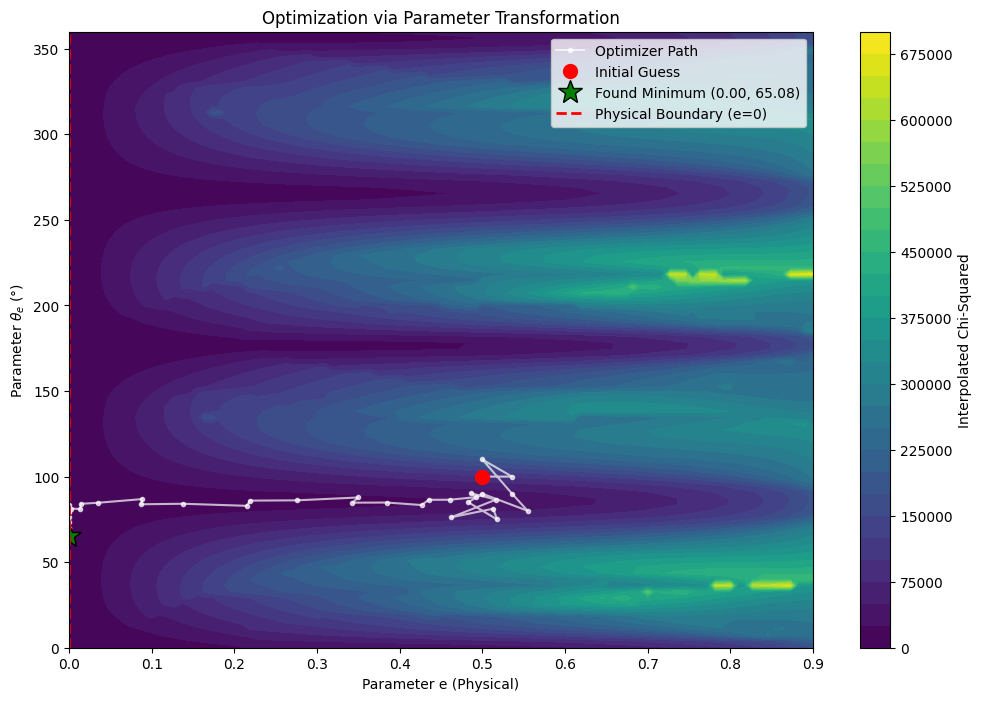

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# (Your nelder_mead_glafic_with_history function remains unchanged)
def nelder_mead_glafic_with_history(func, x0, y0, ftol=1e-4, nmax=10000, verbose=False):
    # --- THIS FUNCTION REQUIRES NO CHANGES ---
    # It will optimize whatever parameters it is given.
    # We are just changing what those parameters represent.
    """
    Nelder-Mead simplex optimization matching glafic's implementation...
    ... (full code from your prompt) ...
    """
    # Simplex coefficients from glafic
    ALPHA = 1.0; BETA = 0.5; GAMMA = 2.0
    n = 2; v = np.zeros((n + 1, n)); f = np.zeros(n + 1)
    eval_history = []
    v[0] = [x0, y0]
    dx = 0.1 * abs(x0) if x0 != 0 else 0.1
    dy = 0.1 * abs(y0) if y0 != 0 else 0.1
    v[1] = [x0 + dx, y0]; v[2] = [x0, y0 + dy]
    for i in range(n + 1):
        f[i] = func(v[i][0], v[i][1])
        eval_history.append((v[i][0], v[i][1], f[i]))
    for itr in range(1, nmax + 1):
        f_finite_indices = np.where(np.isfinite(f))[0]
        if len(f_finite_indices) < 3:
            vs = np.argmin(f)
            for i in range(n + 1):
                if i != vs:
                    v[i] = v[vs] + (v[i] - v[vs]) / 2.0; f[i] = func(v[i][0], v[i][1])
                    eval_history.append((v[i][0], v[i][1], f[i]))
            continue
        f_temp_finite = f[f_finite_indices]
        vg = f_finite_indices[np.argmax(f_temp_finite)]
        vs = f_finite_indices[np.argmin(f_temp_finite)]
        f_temp = f.copy(); f_temp[vg] = -np.inf; vh = np.argmax(f_temp)
        vm = np.mean(v[[i for i in range(n + 1) if i != vg]], axis=0)
        vr = vm + ALPHA * (vm - v[vg]); fr = func(vr[0], vr[1])
        eval_history.append((vr[0], vr[1], fr))
        if np.isnan(fr): fr = np.inf
        if f[vs] <= fr < f[vh]:
            v[vg], f[vg] = vr, fr
        elif fr < f[vs]:
            ve = vm + GAMMA * (vr - vm); fe = func(ve[0], ve[1])
            eval_history.append((ve[0], ve[1], fe))
            if np.isnan(fe): fe = np.inf
            if fe < fr: v[vg], f[vg] = ve, fe
            else: v[vg], f[vg] = vr, fr
        else:
            vc = vm + BETA * (vr - vm) if fr < f[vg] else vm - BETA * (vm - v[vg])
            fc = func(vc[0], vc[1])
            eval_history.append((vc[0], vc[1], fc))
            if np.isnan(fc): fc = np.inf
            if fc < f[vg]: v[vg], f[vg] = vc, fc
            else:
                for i in range(n + 1):
                    if i != vs:
                        v[i] = v[vs] + (v[i] - v[vs]) / 2.0; f[i] = func(v[i][0], v[i][1])
                        eval_history.append((v[i][0], v[i][1], f[i]))
        f_finite = f[np.isfinite(f)]
        if len(f_finite) < 2: continue
        max_f, min_f = np.max(f_finite), np.min(f_finite)
        rtol = 2.0 * abs(max_f - min_f) / (abs(max_f) + abs(min_f)) if (abs(max_f) + abs(min_f)) > 0 else 0.0
        if verbose:
            # For logging, we transform e_log back to e to see the physical value
            current_e_phys = np.exp(v[vs][0])
            print(f"Iteration {itr}: e_phys={current_e_phys:.4f}, f_min = {min_f:.6e}, rtol = {rtol:.6e}")
        if rtol < ftol: break
    vs = np.argmin(f)
    return v[vs][0], v[vs][1], f[vs], eval_history


# --- Main Application ---

# 2. PREPARE DATA FOR INTERPOLATION (Unchanged)
print("\nStep 2: Extracting data from DataFrame...")
points = mask_data[['e', '$θ_{e}$']].values
values = mask_data['chi2'].values

# 3. CREATE THE TRANSFORMING INTERPOLATION FUNCTION
print("\nStep 3: Creating an interpolation function with parameter transformation...")

def create_transformed_interpolator(points, values):
    """
    Creates a chi-squared function that the optimizer can call.
    This function expects a transformed parameter 'e_log' and transforms
    it back to physical 'e' before doing the interpolation.
    """
    def chi2_func(e_log, theta_e):
        # --- INVERT THE TRANSFORMATION ---
        # The optimizer gives us e_log, we turn it into physical e.
        # This guarantees e is always positive.
        e_physical = np.exp(e_log)

        # Now use the guaranteed-positive 'e' for interpolation.
        chi2 = griddata(points, values, (e_physical, theta_e), method='linear', fill_value=np.inf)
        return chi2
        
    return chi2_func

# Create the function to be passed to the optimizer
transformed_chi2_func = create_transformed_interpolator(points, values)
print("Transforming interpolator created successfully.")

# 4. RUN THE OPTIMIZER IN THE TRANSFORMED SPACE
print("\nStep 4: Running Nelder-Mead in transformed parameter space...")
# Define initial guess in the PHYSICAL space
initial_e_physical = 0.5
initial_theta_e = 100.0

# --- TRANSFORM THE INITIAL GUESS ---
# We must convert our physical guess for 'e' into the 'e_log' space
# that the optimizer will work in.
if initial_e_physical <= 0:
    raise ValueError("Initial guess for ellipticity 'e' must be positive for log transformation.")
initial_e_log = np.log(initial_e_physical)
print(f"Physical guess (e={initial_e_physical}) transformed to search space (e_log={initial_e_log:.4f})")

# Run the optimizer with the transformed guess and function
e_log_min, theta_e_min, chi2_min, history = nelder_mead_glafic_with_history(
    transformed_chi2_func,
    initial_e_log, # Pass the transformed guess
    initial_theta_e, # theta_e is not transformed
    verbose=True
)

# 5. TRANSFORM THE RESULT BACK AND PRINT
print("\n--- Optimization Finished ---")

# --- INVERT THE TRANSFORMATION ON THE FINAL RESULT ---
e_min_physical = np.exp(e_log_min)

print(f"Initial Physical Guess: (e={initial_e_physical}, θe={initial_theta_e})")
print(f"Found Minimum Chi-squared (interpolated): {chi2_min:.6f}")
print(f"At Search Parameters: (e_log={e_log_min:.4f}, θe={theta_e_min:.4f})")
print(f"At PHYSICAL Parameters: (e={e_min_physical:.4f}, θe={theta_e_min:.4f})")

# 6. VISUALIZE THE RESULT
print("\nStep 5: Visualizing the results...")
plt.figure(figsize=(12, 8))
# Create grid for plotting
e_grid = np.linspace(data['e'].min(), data['e'].max(), 100)
theta_e_grid = np.linspace(data['$θ_{e}$'].min(), data['$θ_{e}$'].max(), 100)
E_grid, THETA_grid = np.meshgrid(e_grid, theta_e_grid)
CHI2_grid = griddata(points, values, (E_grid, THETA_grid), method='cubic')
# Plot contours
contour = plt.contourf(E_grid, THETA_grid, CHI2_grid, levels=30, cmap='viridis')
plt.colorbar(contour, label='Interpolated Chi-Squared')

# --- TRANSFORM HISTORY FOR PLOTTING ---
# The history is in (e_log, theta_e), so we must convert it back for the plot.
hist_e_physical = [np.exp(p[0]) for p in history]
hist_theta_e = [p[1] for p in history]
plt.plot(hist_e_physical, hist_theta_e, 'w-o', markersize=3, alpha=0.7, label='Optimizer Path')

# Plot key points in physical space
plt.plot(initial_e_physical, initial_theta_e, 'ro', markersize=10, label='Initial Guess')
plt.plot(e_min_physical, theta_e_min, 'g*', markersize=18, markeredgecolor='k', label=f'Found Minimum ({e_min_physical:.2f}, {theta_e_min:.2f})')

plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Physical Boundary (e=0)')
plt.xlabel('Parameter e (Physical)')
plt.ylabel('Parameter $θ_{e}$ (°)')
plt.title('Optimization via Parameter Transformation')
plt.legend()
plt.show()

In [96]:
frames_dir = f'frames_contour_melder-meade'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

# Create a grid of x and y values
x = mask_data['e'].values
y = mask_data['$θ_{e}$'].values
z = mask_data['chi2'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')


# Determine the global range for the z-variable to keep the color bar consistent
z_min = z.min()
z_max = z.max()

# Keep track of the path taken by the optimizer
path_e = []
path_theta_e = []

frame_files = []

# Iterate through the history of the optimizer to create frames
for i, (e_step, theta_e_step, chi2_step) in enumerate(history):
    e_step = (e_step)
    path_e.append(e_step)
    path_theta_e.append(theta_e_step)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot the contour using the pre-calculated grid
    contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow', vmin=z_min, vmax=z_max)
    plt.colorbar(contour, label='Chi-squared')
    
    # Overlay the path of the optimizer up to the current step
    plt.plot(path_e, path_theta_e, 'k-o', markersize=4, alpha=0.8, label='Optimizer Path')
    
    # Highlight the current position
    plt.plot(e_step, theta_e_step, 'go', markersize=10, markeredgecolor='k', label='Current Position')
    
    # Plot the starting point
    plt.plot(initial_e, initial_theta_e, 'ro', markersize=10, label='Initial Guess')

    # Set labels and title
    plt.xlabel('e')
    plt.ylabel('$θ_{e}$')
    plt.title(f'Nelder-Mead Optimization: Step {i+1}/{len(history)}')
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()  # Close the plot to free memory
    frame_files.append(frame_path)

# Create the video from the frames
if frame_files:
    # Use moviepy which was imported in cell 0
    clip = mp.ImageSequenceClip(frame_files, fps=10)
    video_filename = 'pow_sys2_nelder_mead_optimization_animation.mov'
    clip.write_videofile(video_filename, codec='libx264')
    print(f"Video saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated to create a video.")

MoviePy - Building video pow_sys2_nelder_mead_optimization_animation.mov.
MoviePy - Writing video pow_sys2_nelder_mead_optimization_animation.mov



MoviePy - Done !
MoviePy - video ready pow_sys2_nelder_mead_optimization_animation.mov
Video saved as pow_sys2_nelder_mead_optimization_animation.mov


In [ ]:
for i in range(10):
    initial_e_physical = np.random.random_integers(0.0, 0.9)
    initial_theta_e = np.random.random_integers(0.0, 360.0)

    # --- TRANSFORM THE INITIAL GUESS ---
    # We must convert our physical guess for 'e' into the 'e_log' space
    # that the optimizer will work in.
    if initial_e_physical <= 0:
        raise ValueError("Initial guess for ellipticity 'e' must be positive for log transformation.")
    initial_e_log = np.log(initial_e_physical)
    print(f"Physical guess (e={initial_e_physical}) transformed to search space (e_log={initial_e_log:.4f})")

    # Run the optimizer with the transformed guess and function
    e_log_min, theta_e_min, chi2_min, history = nelder_mead_glafic_with_history(
        transformed_chi2_func,
        initial_e_log, # Pass the transformed guess
        initial_theta_e, # theta_e is not transformed
        verbose=True
    )

    frames_dir = f'frames_contour_melder-meade'
    if os.path.exists(frames_dir):
        shutil.rmtree(frames_dir) # Clean up previous frames
    os.makedirs(frames_dir)

    # Create a grid of x and y values
    x = mask_data['e'].values
    y = mask_data['$θ_{e}$'].values
    z = mask_data['chi2'].values

    # Remove NaN values
    mask = ~np.isnan(z)
    x = x[mask]
    y = y[mask]
    z = z[mask]

    # Create interpolation grid
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate z values on regular grid
    zi = griddata((x, y), z, (xi, yi), method='cubic')


    # Determine the global range for the z-variable to keep the color bar consistent
    z_min = z.min()
    z_max = z.max()

    # Keep track of the path taken by the optimizer
    path_e = []
    path_theta_e = []

    frame_files = []

    # Iterate through the history of the optimizer to create frames
    for i, (e_step, theta_e_step, chi2_step) in enumerate(history):
        e_step = (e_step)
        path_e.append(e_step)
        path_theta_e.append(theta_e_step)
        
        # Create the plot
        plt.figure(figsize=(12, 8))
        
        # Plot the contour using the pre-calculated grid
        contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow', vmin=z_min, vmax=z_max)
        plt.colorbar(contour, label='Chi-squared')
        
        # Overlay the path of the optimizer up to the current step
        plt.plot(path_e, path_theta_e, 'k-o', markersize=4, alpha=0.8, label='Optimizer Path')
        
        # Highlight the current position
        plt.plot(e_step, theta_e_step, 'go', markersize=10, markeredgecolor='k', label='Current Position')
        
        # Plot the starting point
        plt.plot(initial_e, initial_theta_e, 'ro', markersize=10, label='Initial Guess')

        # Set labels and title
        plt.xlabel('e')
        plt.ylabel('$θ_{e}$')
        plt.title(f'Nelder-Mead Optimization: Step {i+1}/{len(history)}')
        plt.legend()
        plt.grid(True, alpha=0.2)
        plt.tight_layout()

        # Save the frame
        frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
        plt.savefig(frame_path)
        plt.close()  # Close the plot to free memory
        frame_files.append(frame_path)

    # Create the video from the frames
    if frame_files:
        # Use moviepy which was imported in cell 0
        clip = mp.ImageSequenceClip(frame_files, fps=10)
        video_filename = 'pow_{i}_optimization_animation.mov'
        clip.write_videofile(video_filename, codec='libx264')
        print(f"Video saved as {video_filename}")

        # Clean up the frames directory
        shutil.rmtree(frames_dir)
    else:
        print("No frames were generated to create a video.")